In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# read file
file_path = "data/Structure_Fire_Stats_2000_June2024.csv"
df = pd.read_csv(file_path)

# check dataframe
df.head(5)

,Start_Year,Incident__,Begin_Time,Incident_Type,City,Property_Classification,Response_Type,Act_or_Omission__Cause_,Material_First_Ignited,Igniting_Object,Drive_Time,Start_Hr,First_Enroute,First_At_Scene,Under_Control,Time_UC,FID
0,2001,671,3/10/2001 11:55:58 AM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,00 Cannot be Determined,00 Cannot be determined,00 Object cannot be determined,387,11,3/10/2001 11:58:19 AM,3/10/2001 12:03:11 PM,NaN,NaN,1
1,2001,717,3/15/2001 6:16:38 PM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,91 Chimney fire - masonary,92 Creosote in chimney,"26 Chimney, masonry",281,18,3/15/2001 6:18:18 PM,3/15/2001 6:22:11 PM,3/15/2001 6:57:34 PM,00:35:23,2
2,2001,858,3/31/2001 3:56:35 PM,100 Structure Fire,McLeod Hill,"799 Misc. storage, unclassified",10 Fire (explosion)-dollar loss,00 Cannot be Determined,00 Cannot be determined,00 Object cannot be determined,440,15,3/31/2001 3:59:46 PM,3/31/2001 4:06:08 PM,3/31/2001 4:21:10 PM,00:15:02,3
3,2001,1145,4/26/2001 4:37:17 PM,100 Structure Fire,Charters Settlement,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,00 Cannot be Determined,00 Cannot be determined,00 Object cannot be determined,612,16,4/26/2001 4:39:35 PM,4/26/2001 4:49:42 PM,4/26/2001 6:29:22 PM,01:39:40,4
4,2001,1264,5/3/2001 11:01:41 AM,100 Structure Fire,Fredericton,"311 Dwell,year round use 1 family",10 Fire (explosion)-dollar loss,20 Misuse...Cannot be determined,42 Wood Shavings,98 Chemical reaction/spon comb,75,11,5/3/2001 11:03:13 AM,5/3/2001 11:04:06 AM,5/3/2001 11:15:03 AM,00:10:57,5


array([2001, 2002, 2000, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2003, 2004, 2015, 2019, 2016, 2017, 2013, 2014, 2020, 2021, 2022,
       2023, 2024, 2018])

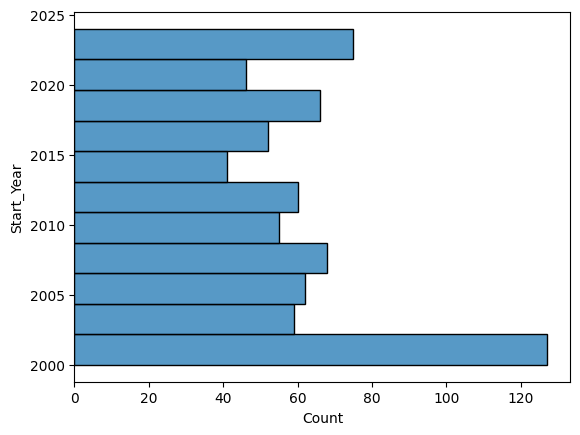

In [4]:
# Let us first look at the number of incidents by year
sns.histplot(data=df, y="Start_Year")

# print unique years
df["Start_Year"].unique()

<Axes: xlabel='Count', ylabel='Incident_Type'>

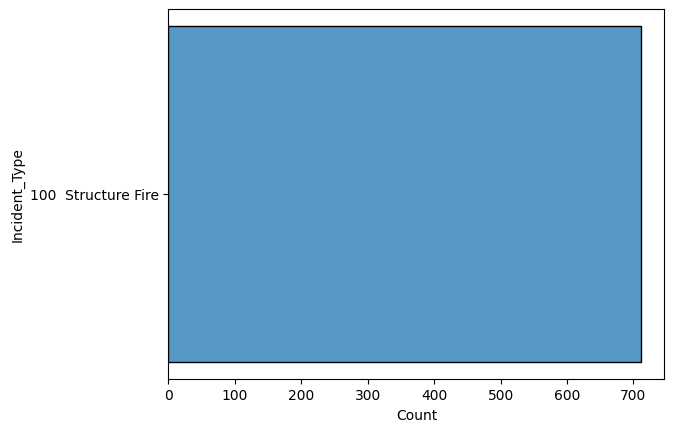

In [7]:
# now let's look at incident type
sns.histplot(data=df, y="Incident_Type")

There seems to be only one kind of incident. Let's check.

In [8]:
df["Incident_Type"].unique()

array(['100  Structure Fire'], dtype=object)

<Axes: xlabel='Count', ylabel='City'>

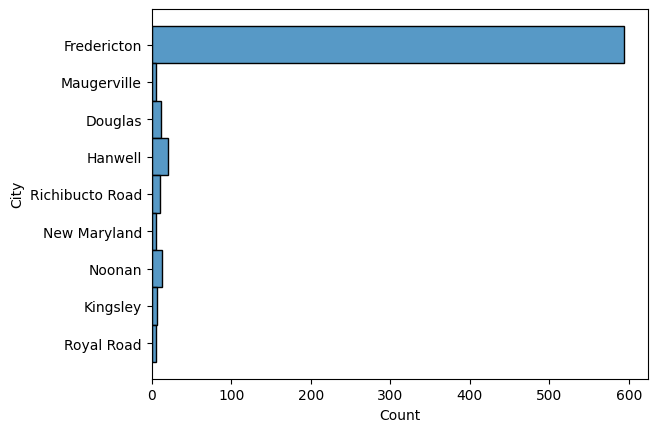

In [25]:
value_counts = df["City"].value_counts()
to_drop = value_counts[value_counts < 5].index
df_filtered = df[~df["City"].isin(to_drop)].copy()

sns.histplot(data=df_filtered, y="City")

In [5]:
df["Begin_Time"] = pd.to_datetime(df["Begin_Time"])
df["Under_Control"] = pd.to_datetime(df["Under_Control"])
df["First_At_Scene"] = pd.to_datetime(df["First_At_Scene"])

/var/folders/89/5rq5rcrx3nx_190mk61bc98h0000gn/T/ipykernel_736/439002973.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Under_Control"] = pd.to_datetime(df["Under_Control"])


What time do these fires often occur?

In [ ]:
hour_bins = {"early night": (0, 3),
             "pre-dawn": (3, 6),
             "early morning": (6, 9),
             "late morning": (9, 12),
             "early afternoon": (12, 15),
             "late afternoon": (15, 18),
             "early evening": (18, 21),
             "late evening": (21, 24)}

def descriptive_hour(x):
    for k, v in hour_bins.items():
        if v[0] <= x < v[1]:
            return k




<Axes: xlabel='Count', ylabel='Igniting_Object'>

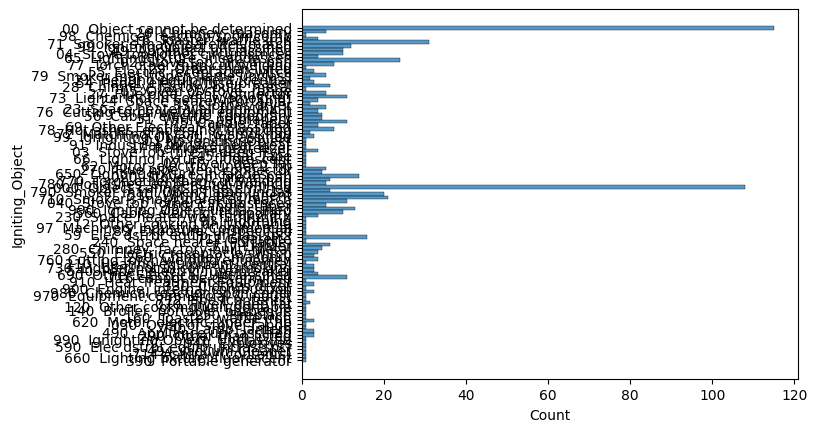

In [29]:
sns.histplot(data=df, y="Igniting_Object")